

# Predição de Diabetes

In [1]:
# Importando pacotes necessários

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

### Carregar a base de dados

In [2]:
# Carregando a base de dados
pacientes = pd.read_csv('./data/diabetes.csv') 
pacientes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Observando as colunas
pacientes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
# Renomeando as colunas para portugues (BR)
pacientes.columns = ['num_gravidez', 
                  'glicose', 
                  'pressao_sanguinea', 
                  'espessura_pele', 
                  'insulina', 
                  'imc', # indice de massa corporal
                  'teste_tolerancia_glicose', 
                  'idade', 
                  'tem_diabetes']
pacientes.head()

,num_gravidez,glicose,pressao_sanguinea,espessura_pele,insulina,imc,teste_tolerancia_glicose,idade,tem_diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Observando o npumero de colunas e linhas
pacientes.shape

(768, 9)

In [6]:
# Analisando a quantodade de pacientes que possuem diabetes
pacientes['tem_diabetes'].value_counts()

tem_diabetes
0    500
1    268
Name: count, dtype: int64

In [7]:
# Analisando a Acuracia base
500/768

0.6510416666666666

In [8]:
# Informacoes basicas das colunas e valores
pacientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   num_gravidez              768 non-null    int64  
 1   glicose                   768 non-null    int64  
 2   pressao_sanguinea         768 non-null    int64  
 3   espessura_pele            768 non-null    int64  
 4   insulina                  768 non-null    int64  
 5   imc                       768 non-null    float64
 6   teste_tolerancia_glicose  768 non-null    float64
 7   idade                     768 non-null    int64  
 8   tem_diabetes              768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
# Avaliando valores faltantes
pacientes.isnull().sum()

num_gravidez                0
glicose                     0
pressao_sanguinea           0
espessura_pele              0
insulina                    0
imc                         0
teste_tolerancia_glicose    0
idade                       0
tem_diabetes                0
dtype: int64

Não temos valores faltantes

### Uma EDA simples pra verificar possíveis correlações e entender melhor a base

In [10]:
# Describe
pacientes.describe()

,num_gravidez,glicose,pressao_sanguinea,espessura_pele,insulina,imc,teste_tolerancia_glicose,idade,tem_diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


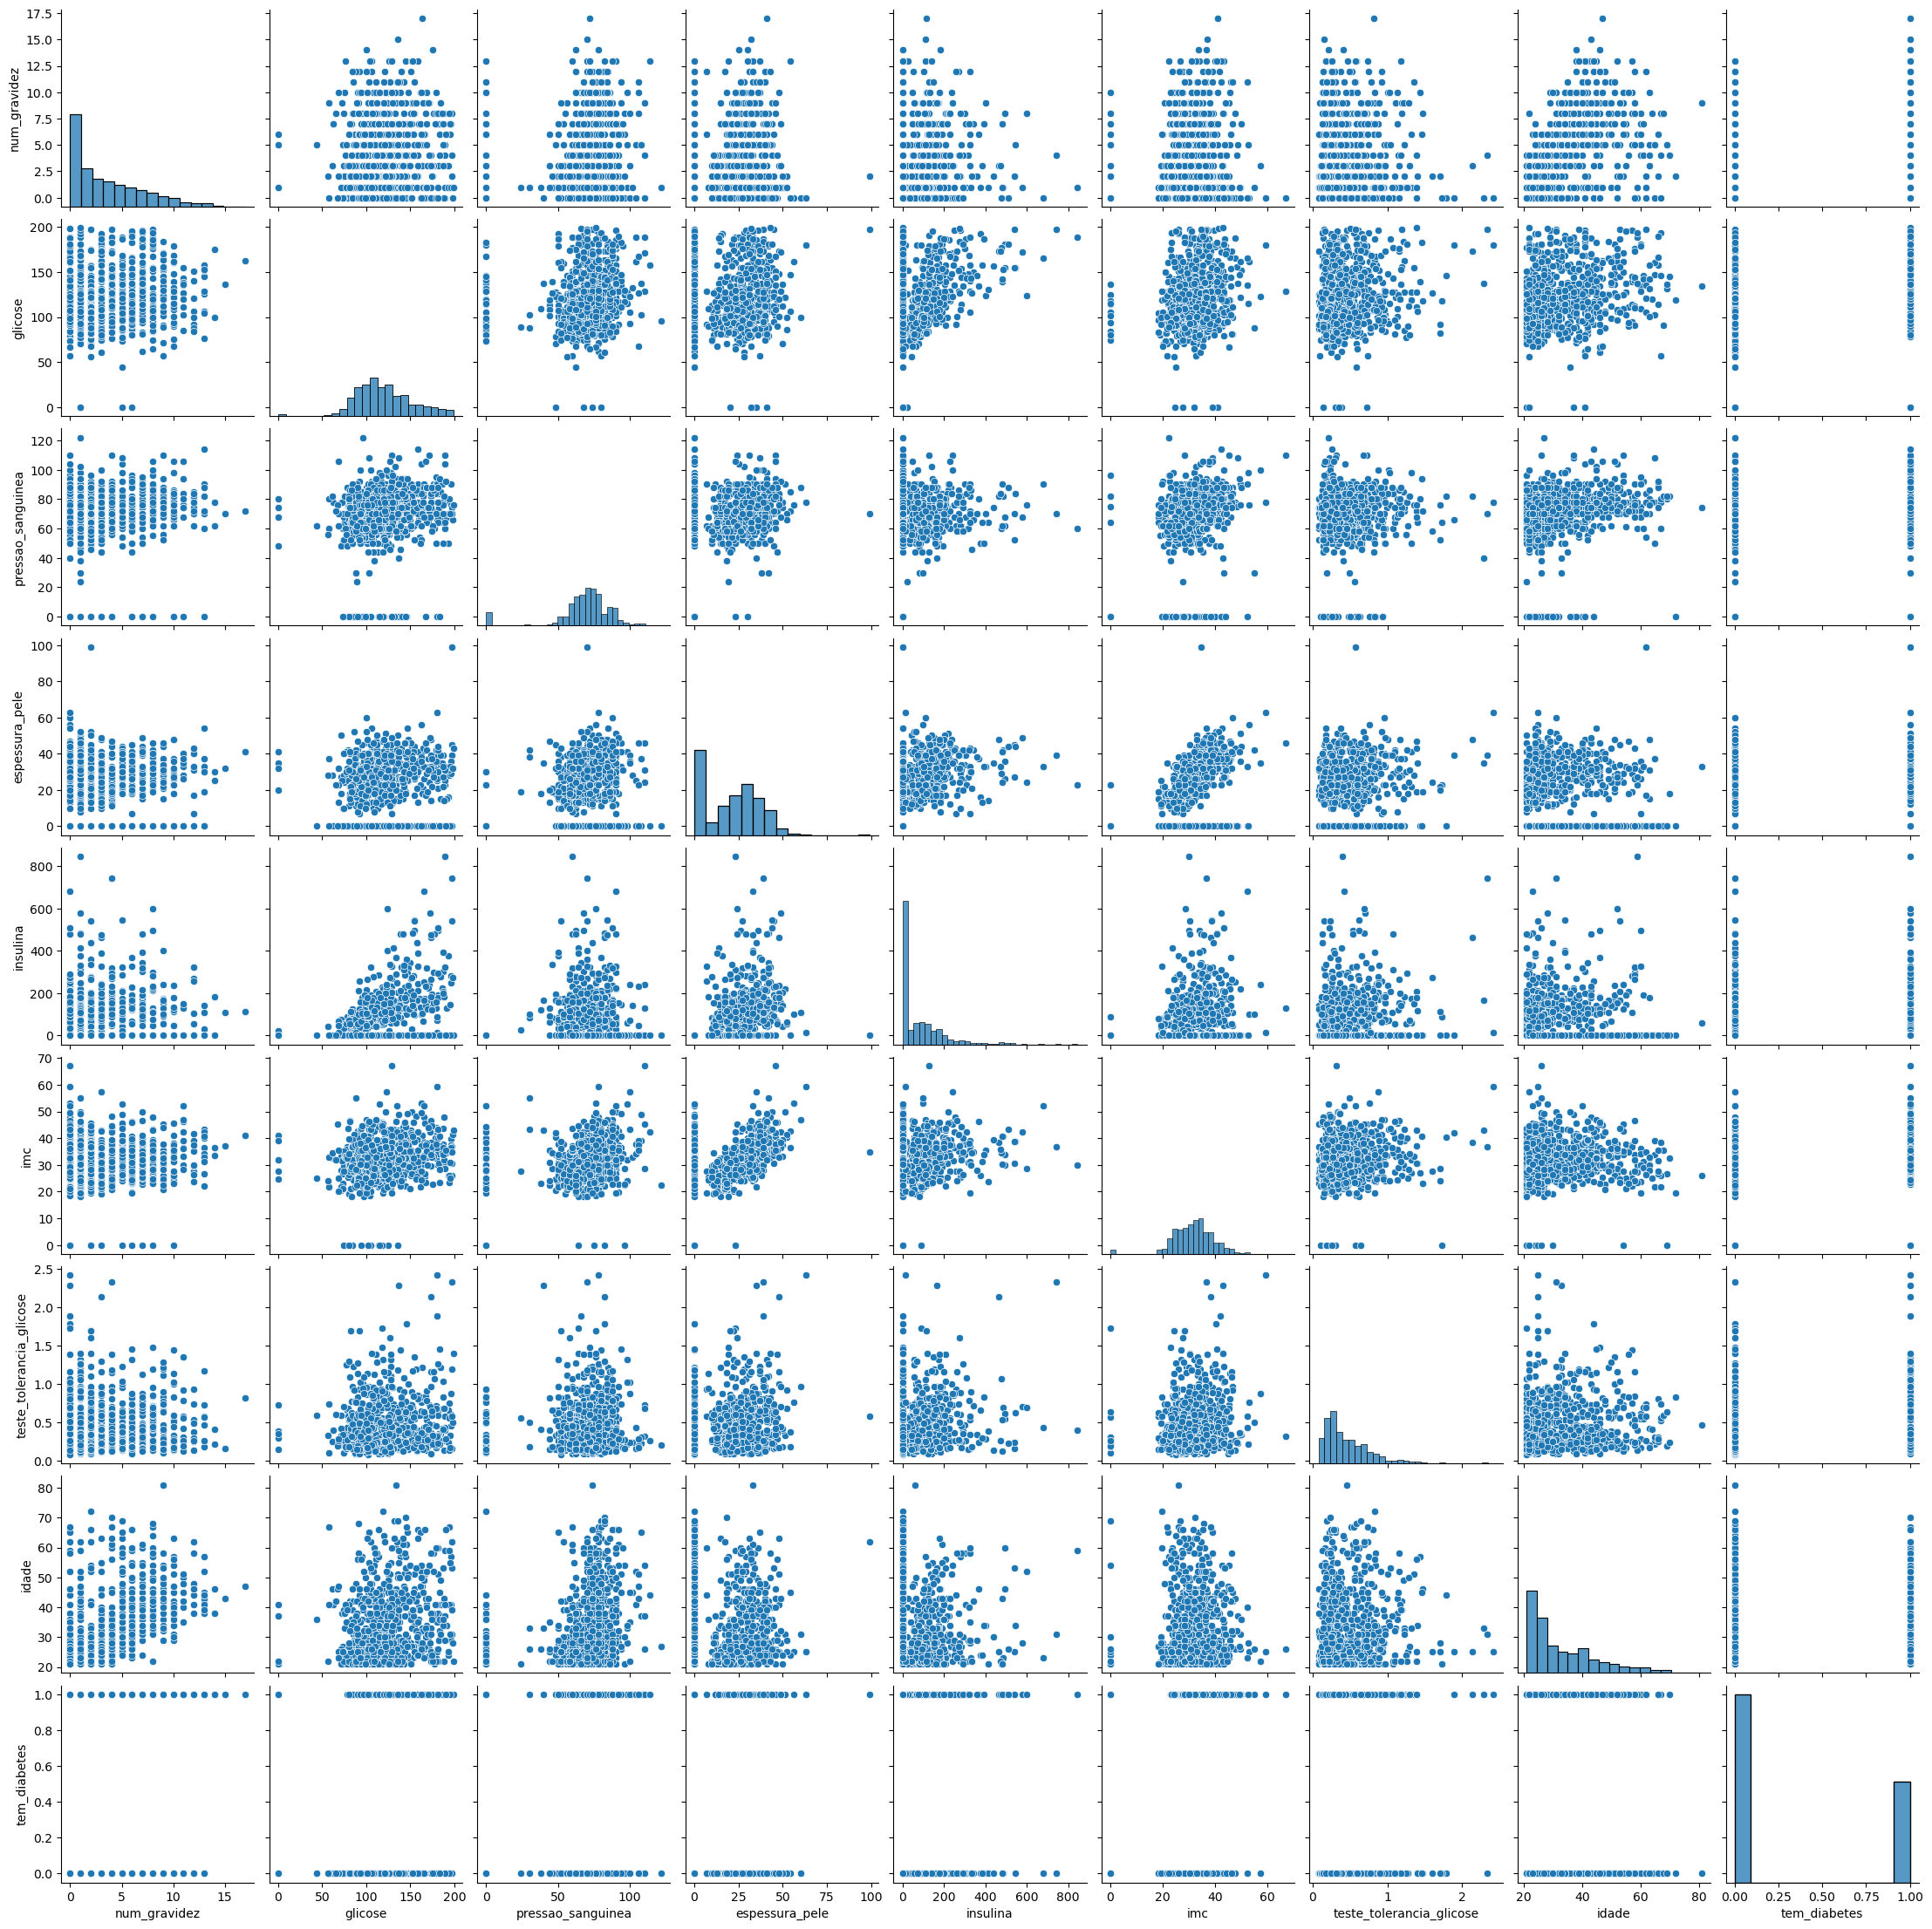

In [11]:
#Criando gráficos pairplot
sns.pairplot(pacientes)

### Separando variáveis preditoras e target

In [12]:
X = pacientes.drop(['tem_diabetes'],axis=1)
Y = pacientes['tem_diabetes']

In [13]:
X.head()

,num_gravidez,glicose,pressao_sanguinea,espessura_pele,insulina,imc,teste_tolerancia_glicose,idade
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [14]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: tem_diabetes, dtype: int64

### Fazendo split (sempre antes de scaling, imputação, codificação de variáveis categóricas)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [16]:
X_train.shape, X_test.shape

((691, 8), (77, 8))

### Tratamento de outliers, dados faltantes e scaling

<AxesSubplot:>

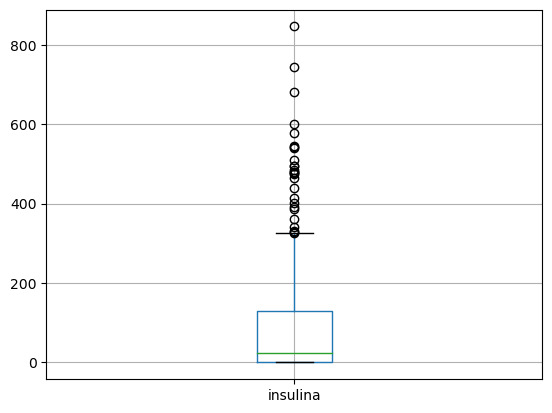

In [17]:
# Remoção de outlier com intervalo interquartilico

# Utilizaremos o gráfico de boxplot pra ajudar
X_train[['insulina']].boxplot()

In [18]:
# IIQ quartil 3 - quartil 1
quartil_1 = X_train['insulina'].describe()['25%']
quartil_3 = X_train['insulina'].describe()['75%']

iiq = quartil_3 - quartil_1

iiq

130.0

In [19]:
# Valores 1,5 IIQ abaixo de Q1 ou mais de 1,5 IIQ acima de Q3 são consideradas outliers.
outlier_pra_baixo = quartil_1 - (1.5 * iiq)
outlier_pra_cima = quartil_3 + (1.5 * iiq)

outlier_pra_baixo, outlier_pra_cima

(-195.0, 325.0)

In [20]:
# Para remover os outliers

X_train_sem_outliers = X_train.loc[(X_train['insulina'] > outlier_pra_baixo) & (X_train['insulina'] < outlier_pra_cima)]
X_train_sem_outliers.shape

(661, 8)

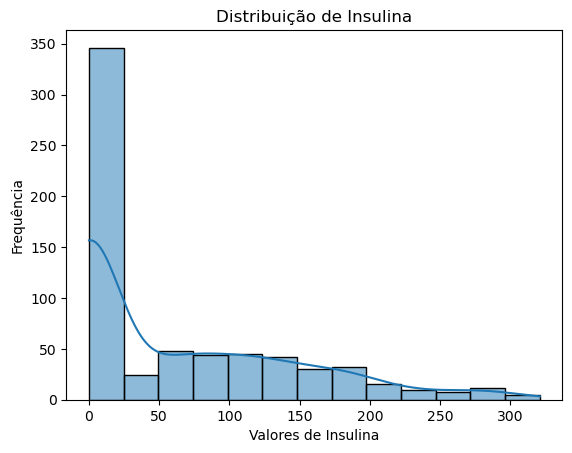

In [21]:
# Criando gráfico para analisar os valores de Insulina
sns.histplot(X_train_sem_outliers['insulina'], kde=True)
plt.xlabel('Valores de Insulina')
plt.ylabel('Frequência')
plt.title('Distribuição de Insulina')
plt.show()

<AxesSubplot:>

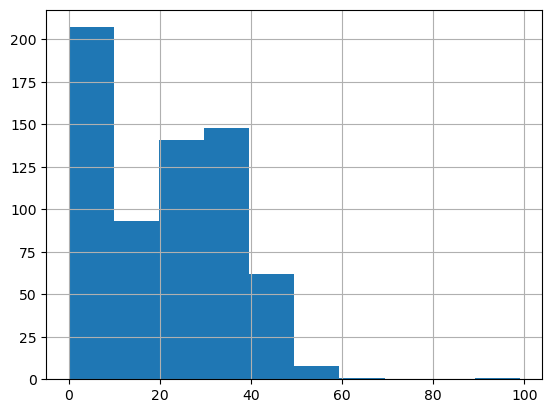

In [22]:
X_train_sem_outliers['espessura_pele'].hist()

In [23]:
len(X_train_sem_outliers.loc[X_train_sem_outliers['espessura_pele'] == 0])

204

In [24]:
media_espessura_NO_TREEEEEINO = X_train_sem_outliers.loc[X_train_sem_outliers['espessura_pele'] > 0, 'espessura_pele'].mean()
media_espessura_NO_TREEEEEINO

28.89496717724289

<AxesSubplot:>

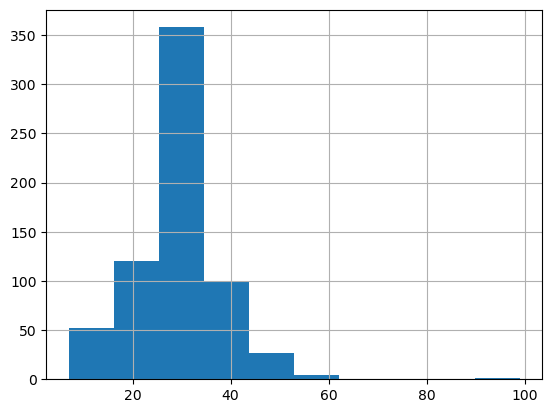

In [25]:
X_train_sem_outliers.loc[X_train_sem_outliers['espessura_pele'] == 0, 'espessura_pele'] = media_espessura_NO_TREEEEEINO
X_train_sem_outliers['espessura_pele'].hist()

<AxesSubplot:>

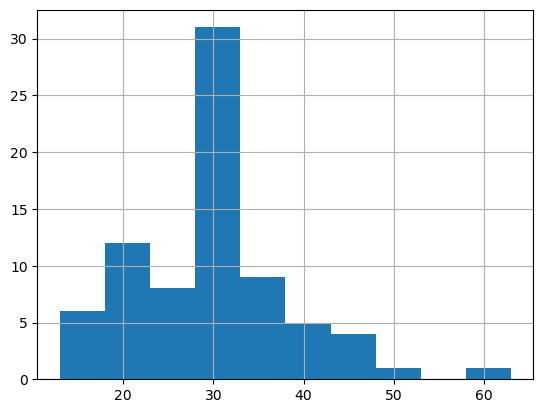

In [26]:
# Agora sim, aplicar no teste
X_test.loc[X_test['espessura_pele'] == 0, 'espessura_pele'] = media_espessura_NO_TREEEEEINO
X_test['espessura_pele'].hist()


In [27]:
# Fazendo scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Treinando os modelos

1. Regressão linear

In [28]:
# Criando objeto de regressao linear
classifier = svm.SVC(kernel='linear')

Validação do modelo com cross validation

In [29]:
# Validacao cruzada com acurácia 
scores_svm = cross_val_score(classifier, X_train, y_train, scoring='accuracy', cv=5)
scores_svm

array([0.73381295, 0.76811594, 0.79710145, 0.76086957, 0.79710145])

In [30]:
scores_svm.mean()

0.7714002710874779

2. Random Forest

In [31]:
# Criando objeto de random forest
rf_classifier = RandomForestClassifier()

Validação do modelo com cross validation

In [32]:
# Validacao cruzada com acurácia de métrica
scores_rf = cross_val_score(rf_classifier, X_train, y_train, scoring='accuracy', cv=5)
scores_rf

array([0.74820144, 0.73913043, 0.76811594, 0.74637681, 0.73913043])

In [33]:
scores_rf.mean()

0.7481910124074652

### Treinando na base de treino

Agora que sabemos qual o nosso modelo campeão

In [34]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

### Treinando na base de testes

In [35]:
# Predições na base de teste
predicoes = classifier.predict(X_test)

In [36]:
error_score = accuracy_score(y_test, predicoes)
print("Acurácia : ", error_score)

Acurácia :  0.7792207792207793


### Modelo pronto, validado e testado!!! Hora de "empacotar" pra usar na aplicação

In [37]:
import joblib

with open('./models/classifier.pkl', 'wb') as arquivo_modelo:
    joblib.dump(classifier, arquivo_modelo,compress=3)
    
with open('./models/scaler.pkl', 'wb') as arquivo_modelo:
    joblib.dump(scaler, arquivo_modelo,compress=3)

In [ ]:
# Rodando a aplicação
!streamlit run diabetes.py